In [1]:
import Structural_analysis as dp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Example 1

Solution of static problelem obtained from [1]. Problem's values were converted to metric units. The system was broken down to 4 beams and 5 supports. Supports are named "a", "b",... from left to right, beams are named "first", "second",.. from left to right. According to [1] the probelm was solved correctly.
<img src="files/677staticshibbeler.png" style="width: 500px;"/>

In [2]:
#In this cell we define all supports and beams included in the problem

a = dp.Support("a", 'fixed', 0, 0)
b = dp.Support("b", 'endpoint', 1.22, 0)
c = dp.Support("c", "joint", 2.44, 0)
d = dp.Support("d", "endpoint", 4.88, 0)
e = dp.Support("e", "roller", 6.12, 0)

first = dp.Beam('first', [a,], [b,],  0.006, 200e6, 0.01, 1.22, 100)
second = dp.Beam('second', [b,], [c,],  0.006, 200e6, 0.01, 1.22, 100)
third = dp.Beam('third', [c,], [d,],  0.006, 200e6, 0.01, 2.44, 100)
forth = dp.Beam('forth', [d,], [e,],  0.006, 200e6, 0.01, 1.22, 100)

In [3]:
#In this cell we define the matrices for solving main differential equations of individual beams

first.set_equations_u()
first.set_equations_w()
second.set_equations_u()
second.set_equations_w()
third.set_equations_u()
third.set_equations_w()
forth.set_equations_u()
forth.set_equations_w()

In [4]:
#In this cell we define transformation matrices used for transforming variables from local coordinate systems of individual beam to global coordinate system

first.transformation_matrix()
second.transformation_matrix()
third.transformation_matrix()
forth.transformation_matrix()

In [5]:
#in this cell we define all boundry equations hat may be needed for individual beam and support

first.set_boundry_1()
first.set_boundry_2()
second.set_boundry_1()
second.set_boundry_2()
third.set_boundry_1()
third.set_boundry_2()
forth.set_boundry_1()
forth.set_boundry_2()

first.set_boundry_M(first.B_1, a)
first.set_boundry_M(first.B_2, b)

second.set_boundry_M(second.B_1, b)
second.set_boundry_M(second.B_2, c)

third.set_boundry_M(third.B_1, c)
third.set_boundry_M(third.B_2, d)

forth.set_boundry_M(forth.B_1, d)
forth.set_boundry_M(forth.B_2, e)

In [6]:
#In this cell we form final beam matrices

first.form_M([a,], [b,])
second.form_M([b,], [c,])
third.form_M([c,], [d,])
forth.form_M([d,], [e,])

In [7]:
#In this cell we define loading conditions, either forces or moments on supports or continual loading on beams

first.set_loading(0, 0)
second.set_loading(0, 0)
third.set_loading(0, 0)
forth.set_loading(0, 0)

a.set_boundryforces(0, 0, 0, 0, 0, 0)
b.set_boundryforces(0, 0, 0, -846, 2031, 0)
c.set_boundryforces(0, 0, 0, 0, 0, 0)
d.set_boundryforces(0, 0, 0, 445, 770, 0)
e.set_boundryforces(0, 0, 0, 0, 0, -5423)

In [8]:
#In this cell we form boundry matrices for individual beams

first.form_b([a,],  [b,])
second.form_b([b,],  [c,])
third.form_b([c,],  [d,])
forth.form_b([d,],  [e,])

In [9]:
#Forms final matric and vector for calculation, Naming is vector containing information abount individual equation in M
M, b, Naming = dp.main_matrix_formation(
    (first.M, second.M, third.M, forth.M), 
    (first.b, second.b, third.b, forth.b), 
    (first.Naming, second.Naming, third.Naming, forth.Naming),  (a, b, c, d, e))

In [10]:
#Solving the problem
r = np.linalg.solve(M, b)

In [11]:
#Resoult parsing and calculating internal forces
dp.resoult_parsing(r, first, second, third, forth)

first.calculate_NTM()
second.calculate_NTM()
third.calculate_NTM()
forth.calculate_NTM()

## Plots for individual beam

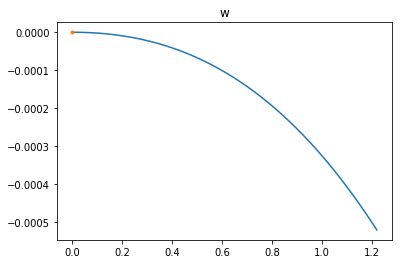

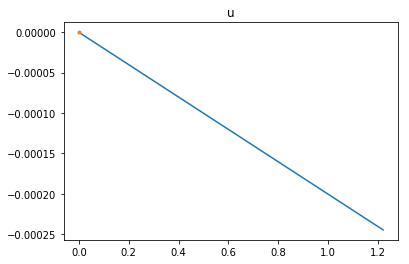

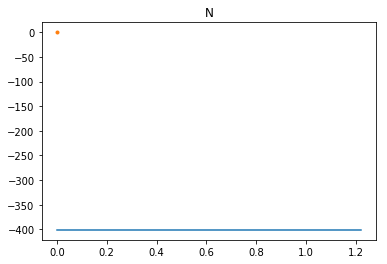

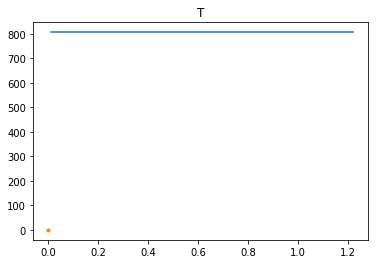

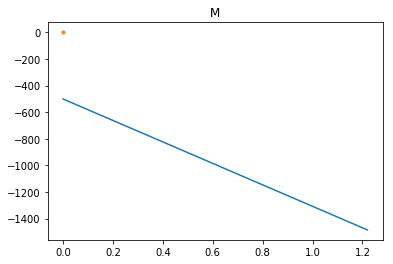

In [12]:
first.drawing()

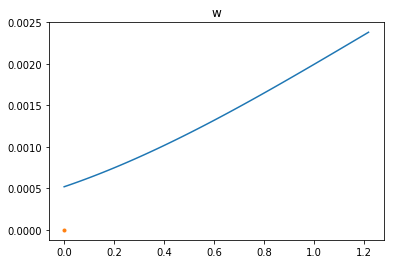

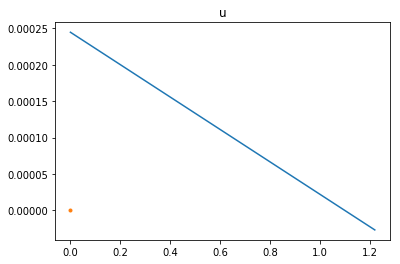

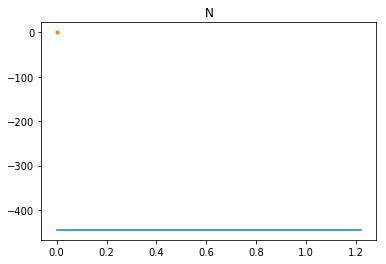

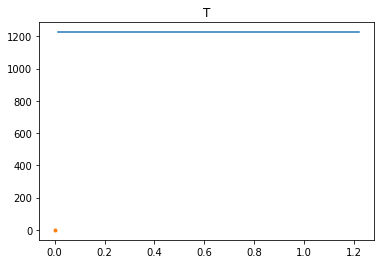

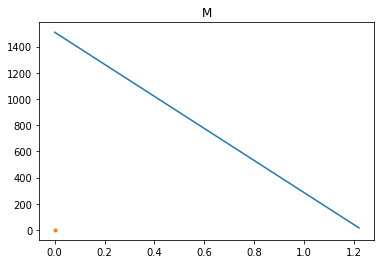

In [13]:
second.drawing()

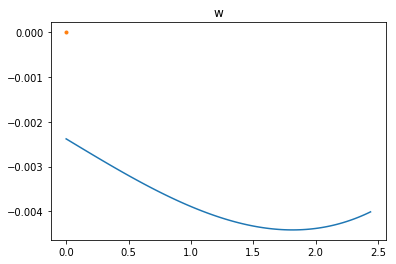

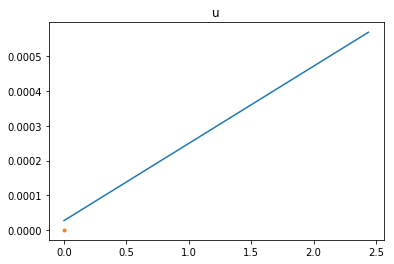

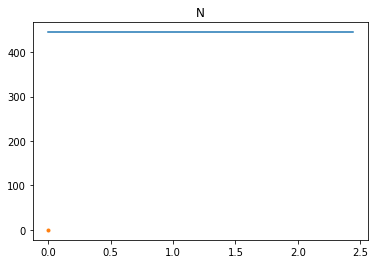

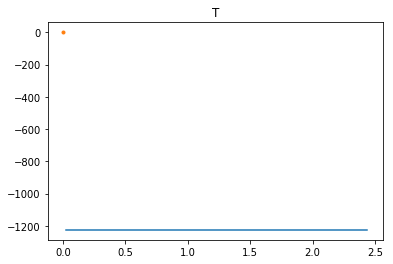

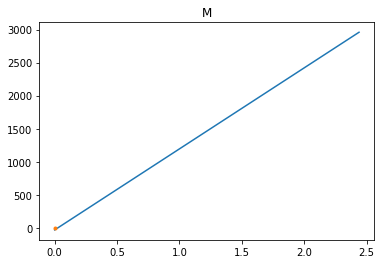

In [14]:
third.drawing()

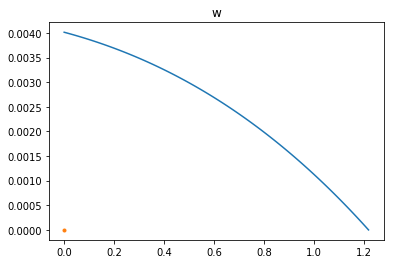

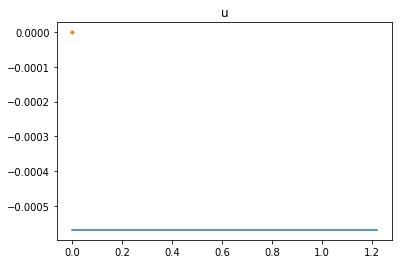

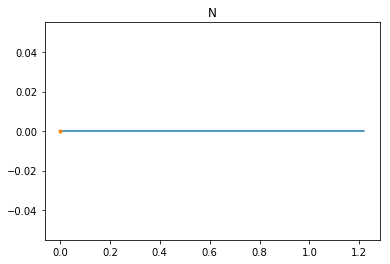

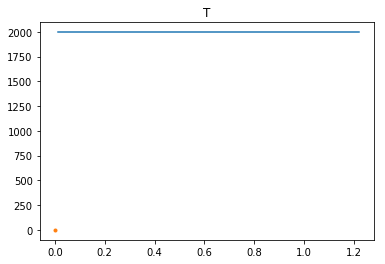

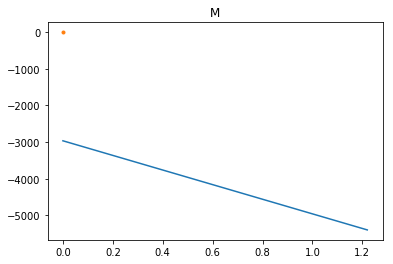

In [15]:
forth.drawing()

### References:
[1] Hibbeler, R. C., Statics, 12th edition, page 313